#### Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [6]:
housing = pd.read_csv("C:\\Users\\DELL\\Desktop\\Assignment_SurpriseHousing\\train.csv")

In [7]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
housing.shape

(1460, 81)

In [9]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
null_values = housing.isnull().sum().sort_values(ascending = False)
null_values.head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [16]:
null_perc = (housing.isnull().sum() / housing.isnull().count()*100).sort_values(ascending = False)
null_perc.head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Id               0.000000
dtype: float64

In [18]:
#droping the column with high missing data 
housing.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'] , axis = 1 , inplace = True)

In [19]:
housing[['LotFrontage','MasVnrArea','GarageYrBlt']].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [20]:
 #Treaing missing values by imputing for columns  with contineous variable and missing values less than or equal to 40%

housing['LotFrontage']= housing.LotFrontage.fillna(housing.LotFrontage.median()) #Can see a presence of outlier so imputing the missing values through median
housing['MasVnrArea']= housing.MasVnrArea.fillna(housing.MasVnrArea.median())    # Can see presence of outlier
housing['GarageYrBlt']= housing.GarageYrBlt.fillna(housing.GarageYrBlt.mean())  # it looks stable with no outlier presence so we can use mean for imputation

In [28]:
# Null values that still exists
null_values = housing.isnull().sum().sort_values(ascending = False)
null_values.head(12)

GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtQual        37
BsmtCond        37
MasVnrType       8
Electrical       1
FullBath         0
dtype: int64

In [35]:
# Percentage of null values present
null_perc = (housing.isnull().sum() / housing.isnull().count()*100).sort_values(ascending = False)
null_perc.head(12)

GarageType      5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
BsmtExposure    2.602740
BsmtFinType2    2.602740
BsmtFinType1    2.534247
BsmtQual        2.534247
BsmtCond        2.534247
MasVnrType      0.547945
Electrical      0.068493
FullBath        0.000000
dtype: float64

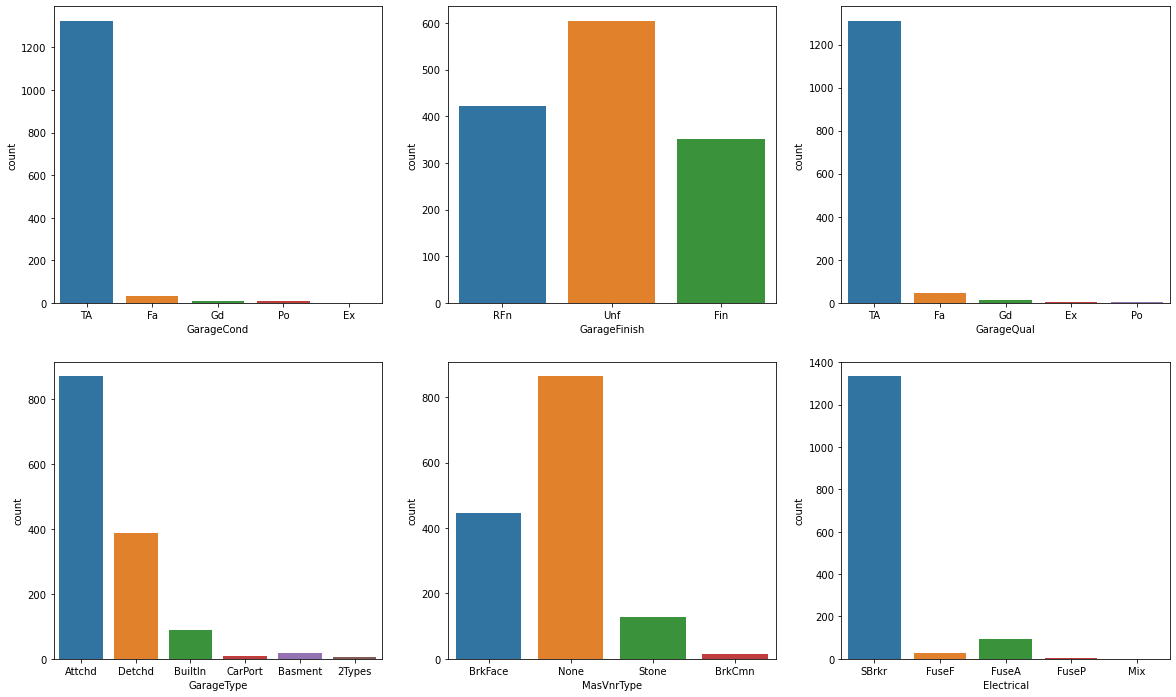

In [32]:
#Visualising the variables wih missing values using a countplot

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageCond', data = housing)
plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish',  data = housing)
plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = housing)
plt.subplot(2,3,4)
sns.countplot(x = 'GarageType', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'MasVnrType',  data = housing)
plt.subplot(2,3,6)
sns.countplot(x = 'Electrical',  data = housing)
plt.show()

In [36]:
# Cases when the house doesn't have the garage so replacing null with 'No Garage' as mentioned in data dictionary

housing['GarageType'] = housing['GarageType'].replace(np.nan, 'NoGarage')
housing['GarageFinish'] = housing['GarageFinish'].replace(np.nan, 'NoGarage')
housing['GarageCond'] = housing['GarageCond'].replace(np.nan, 'NoGarage')
housing['GarageQual'] = housing['GarageQual'].replace(np.nan, 'NoGarage')
housing['MasVnrType'] = housing['MasVnrType'].replace(np.nan, 'None') # replacing nan with the top option of this field
housing['Electrical'] = housing['Electrical'].replace(np.nan, 'SBrkr') # replacing nan with the top option of this field

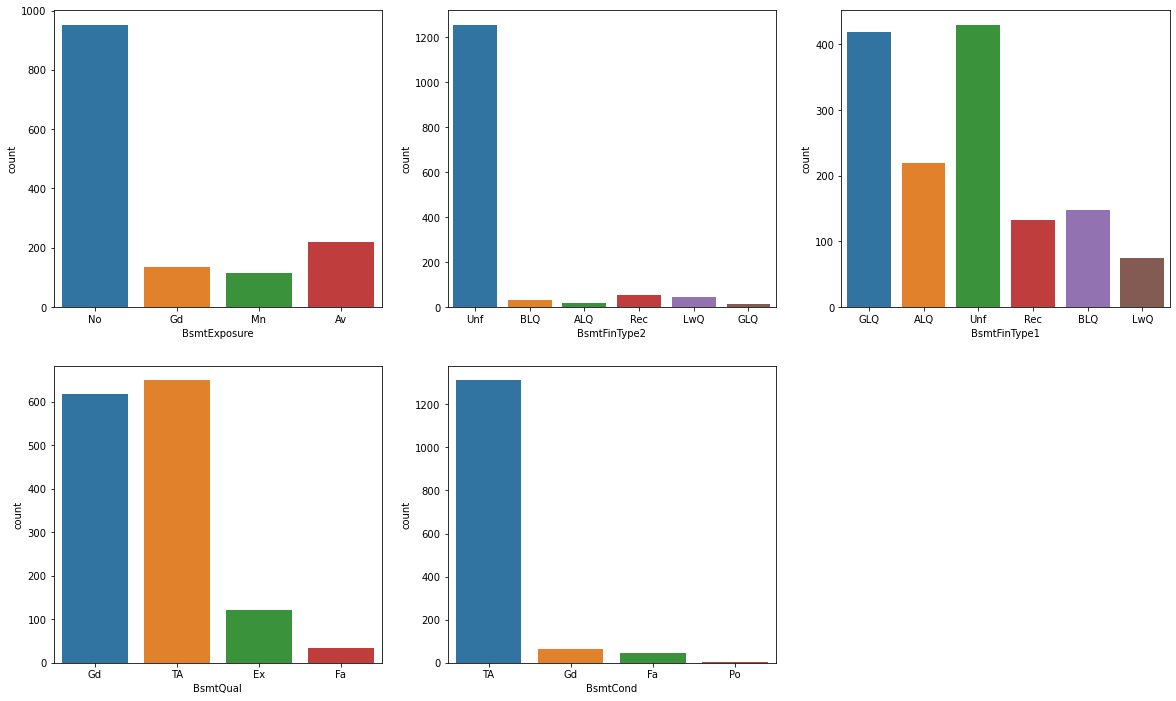

In [33]:
#Visualising the variables wih missing values

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtExposure', data = housing)
plt.subplot(2,3,2)
sns.countplot(x = 'BsmtFinType2',  data = housing)
plt.subplot(2,3,3)
sns.countplot(x = 'BsmtFinType1', data = housing)
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtQual', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'BsmtCond',  data = housing)
plt.show()

In [37]:
# Replacing all the missing values for Basement reated with 'No Basement' as mentioned in data dictionary
housing['BsmtExposure'] = housing['BsmtExposure'].replace(np.nan, 'NoBasement')
housing['BsmtFinType2'] = housing['BsmtFinType2'].replace(np.nan, 'NoBasement')
housing['BsmtFinType1'] = housing['BsmtFinType1'].replace(np.nan, 'NoBasement')
housing['BsmtQual'] = housing['BsmtQual'].replace(np.nan, 'NoBasement')
housing['BsmtCond'] = housing['BsmtCond'].replace(np.nan, 'NoBasement') 

#### All the missing Values are treated

In [39]:
null_values = housing.isnull().sum().sort_values(ascending = False)
null_values.head(10)

Id              0
FullBath        0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
BsmtHalfBath    0
dtype: int64

In [64]:
#Converting the numbers to categorical so as to form these as dummy variables 
housing['MSSubClass']=housing['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

housing['OverallQual']=housing['OverallQual'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})
housing['OverallCond']=housing['OverallCond'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

In [66]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,12.429216


#### Lets now check for the dependant variable 'SalePrice'

In [40]:
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

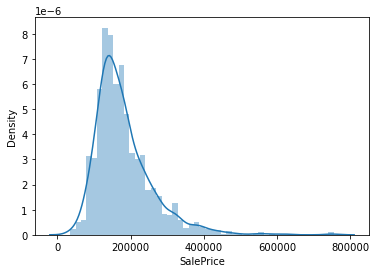

In [41]:
sns.distplot(housing.SalePrice)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

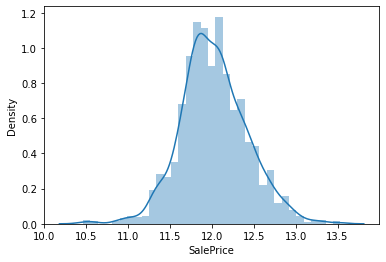

In [42]:
# The SalePrice is skewed , so we take the log of SalePrice and me it normally distributed
housing['SalePrice'] = np.log(housing.SalePrice)
sns.distplot(housing.SalePrice)

In [43]:
housing['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

#### The dependant variable SalePrice is Normally Distributed

## EDA

<AxesSubplot:>

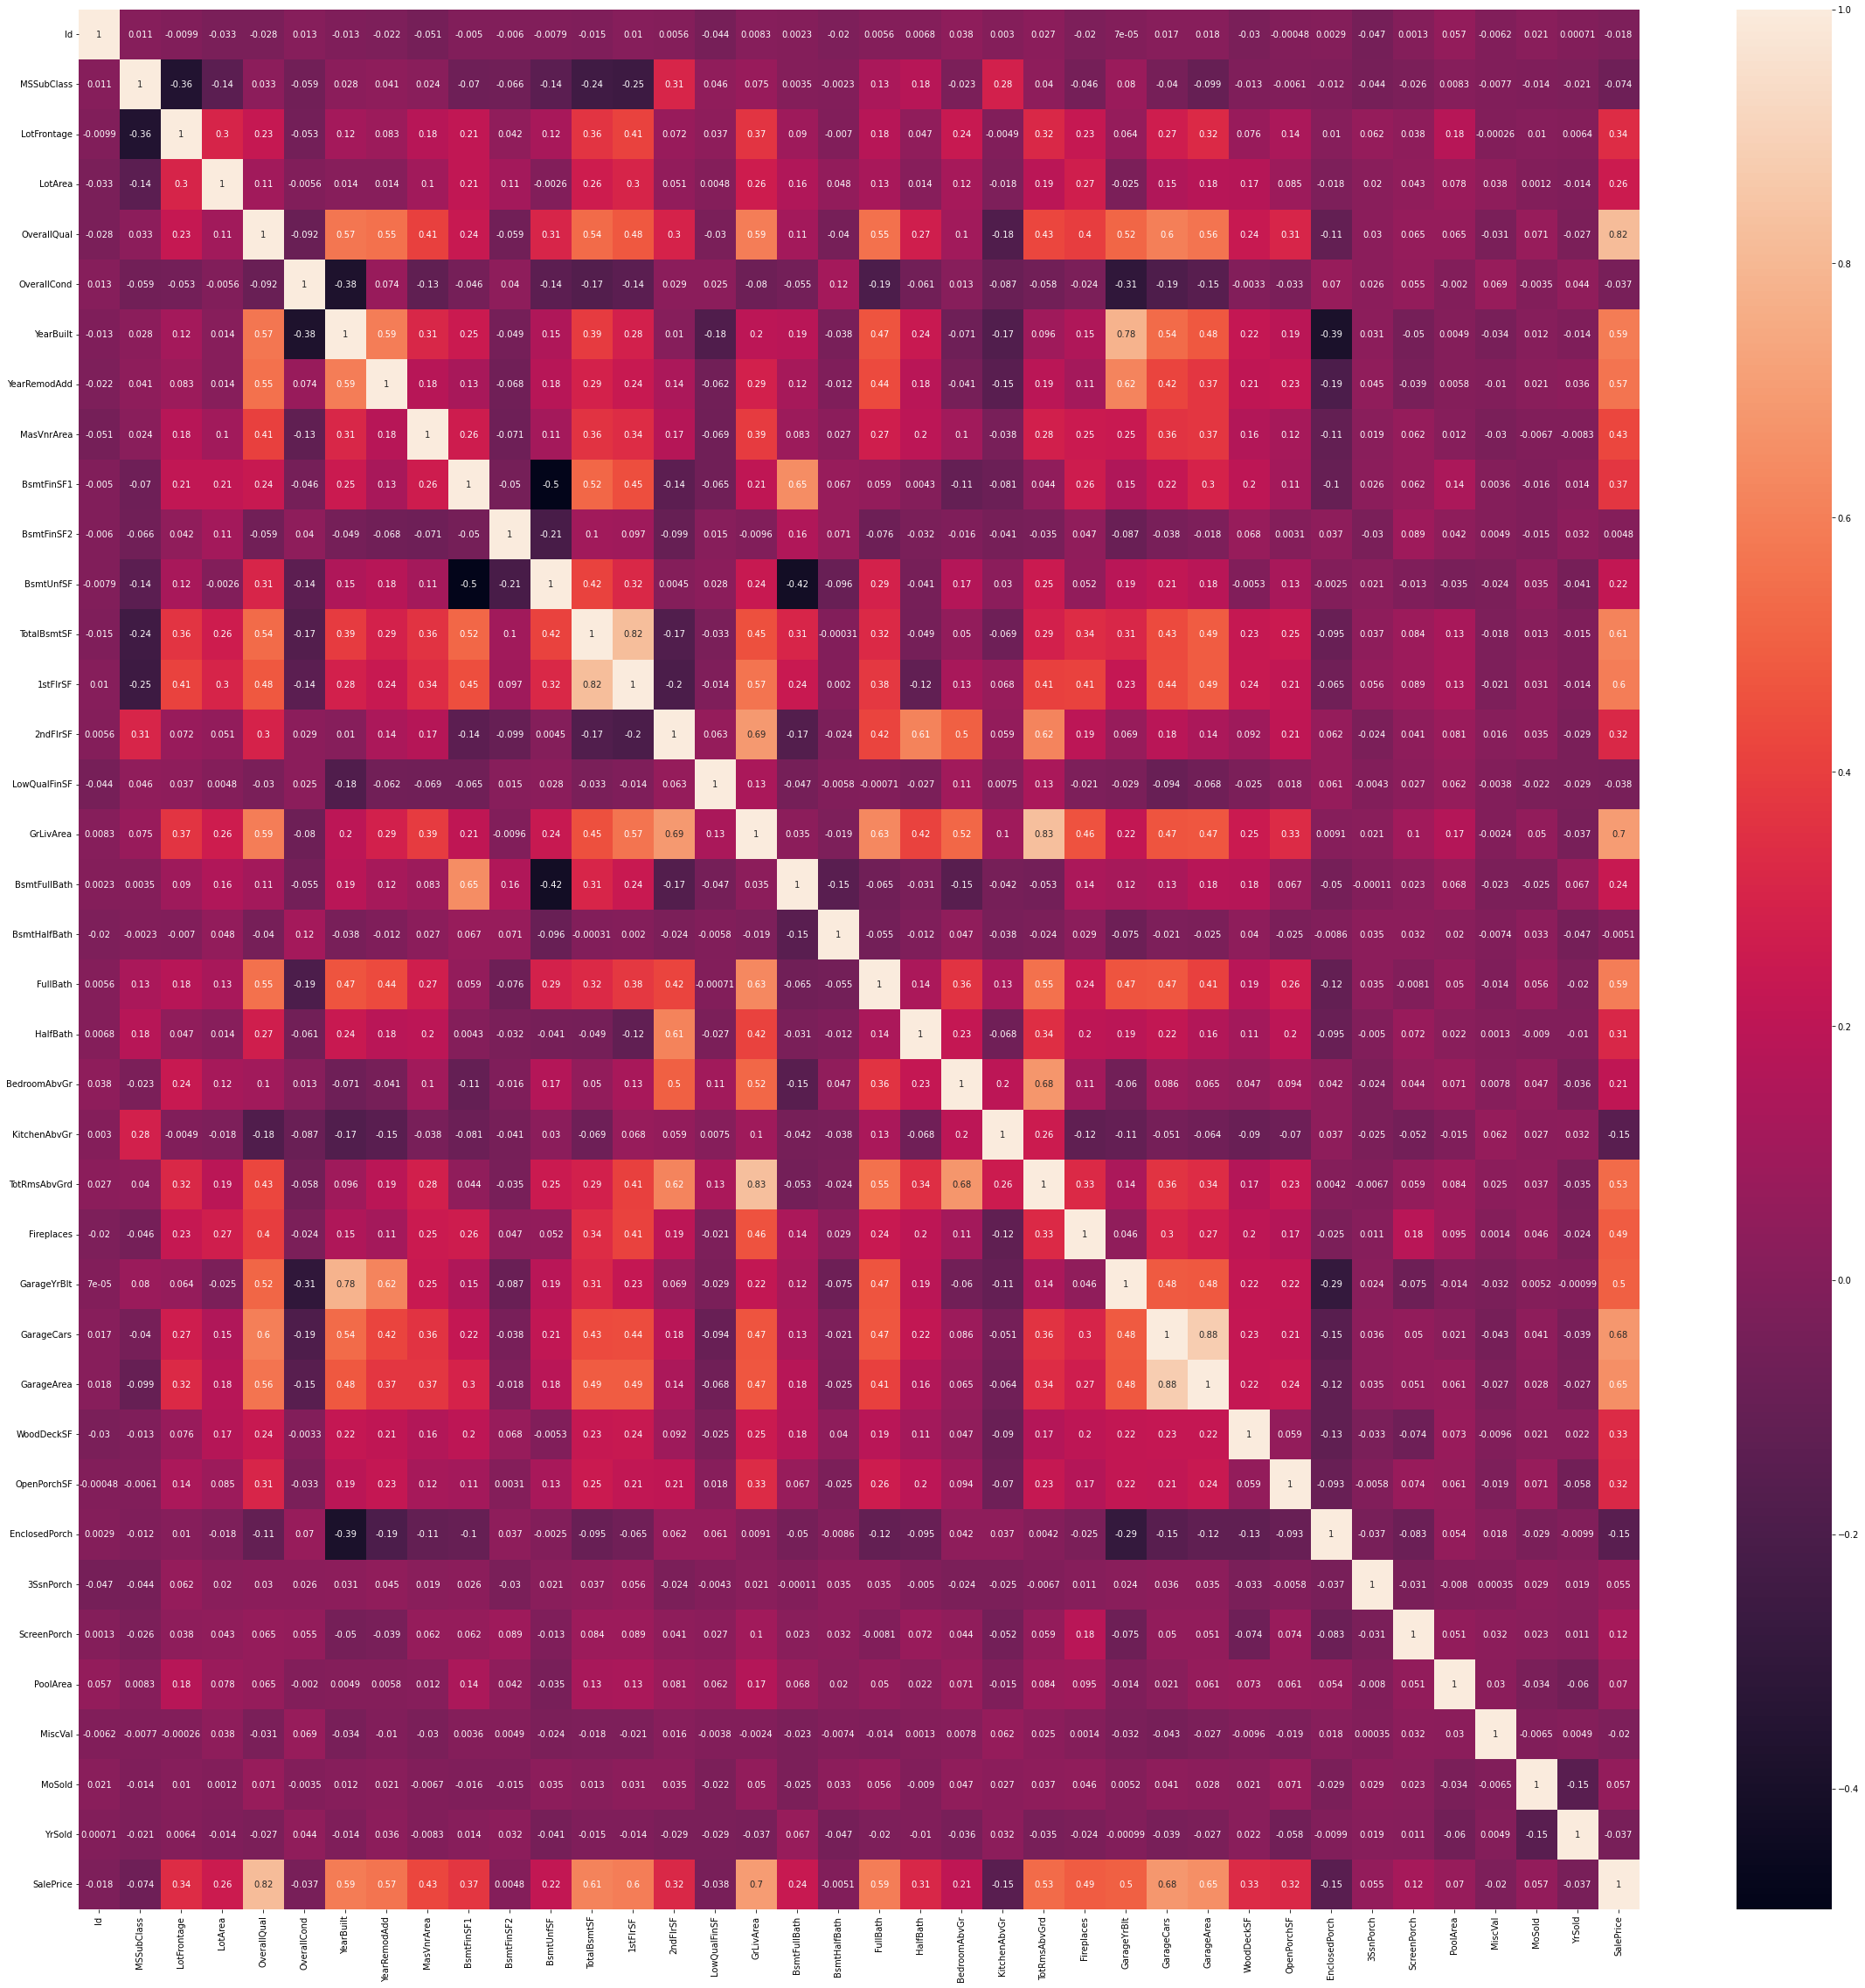

In [63]:
#Heatmap to see correlation between variables
plt.figure(figsize=(40, 40))
sns.heatmap(housing.corr(), annot = True)

In [49]:
corr_val = housing[list(housing.dtypes[housing.dtypes != 'object'].index)].corr()

In [50]:
# Will find the list of categories which are highly correlated
corr_coef = corr_val[corr_val['SalePrice'] > 0.5]['SalePrice'].sort_values(ascending=False)
print(corr_coef[1:])
corr_coef_cols = [idx for idx in corr_coef.index]

OverallQual     0.817184
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
TotRmsAbvGrd    0.534422
GarageYrBlt     0.500449
Name: SalePrice, dtype: float64


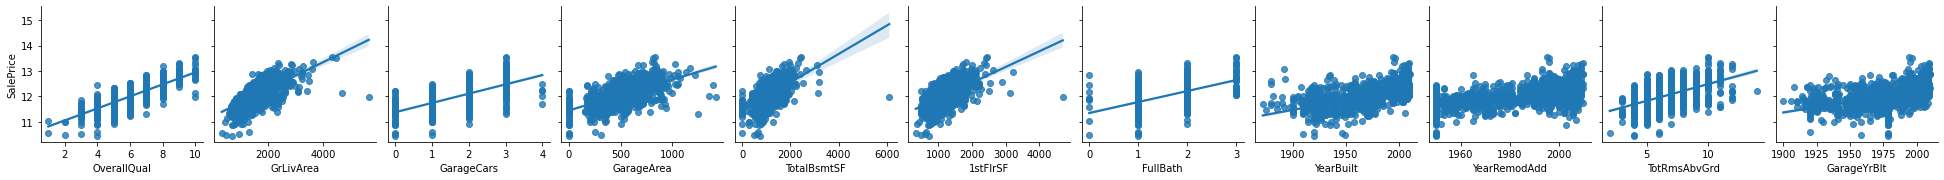

In [56]:
# Visualise using Pair plots for the correlated features
sns.pairplot(housing, x_vars=corr_coef_cols[1:], y_vars=[corr_coef_cols[0]], kind="reg" )
plt.show()

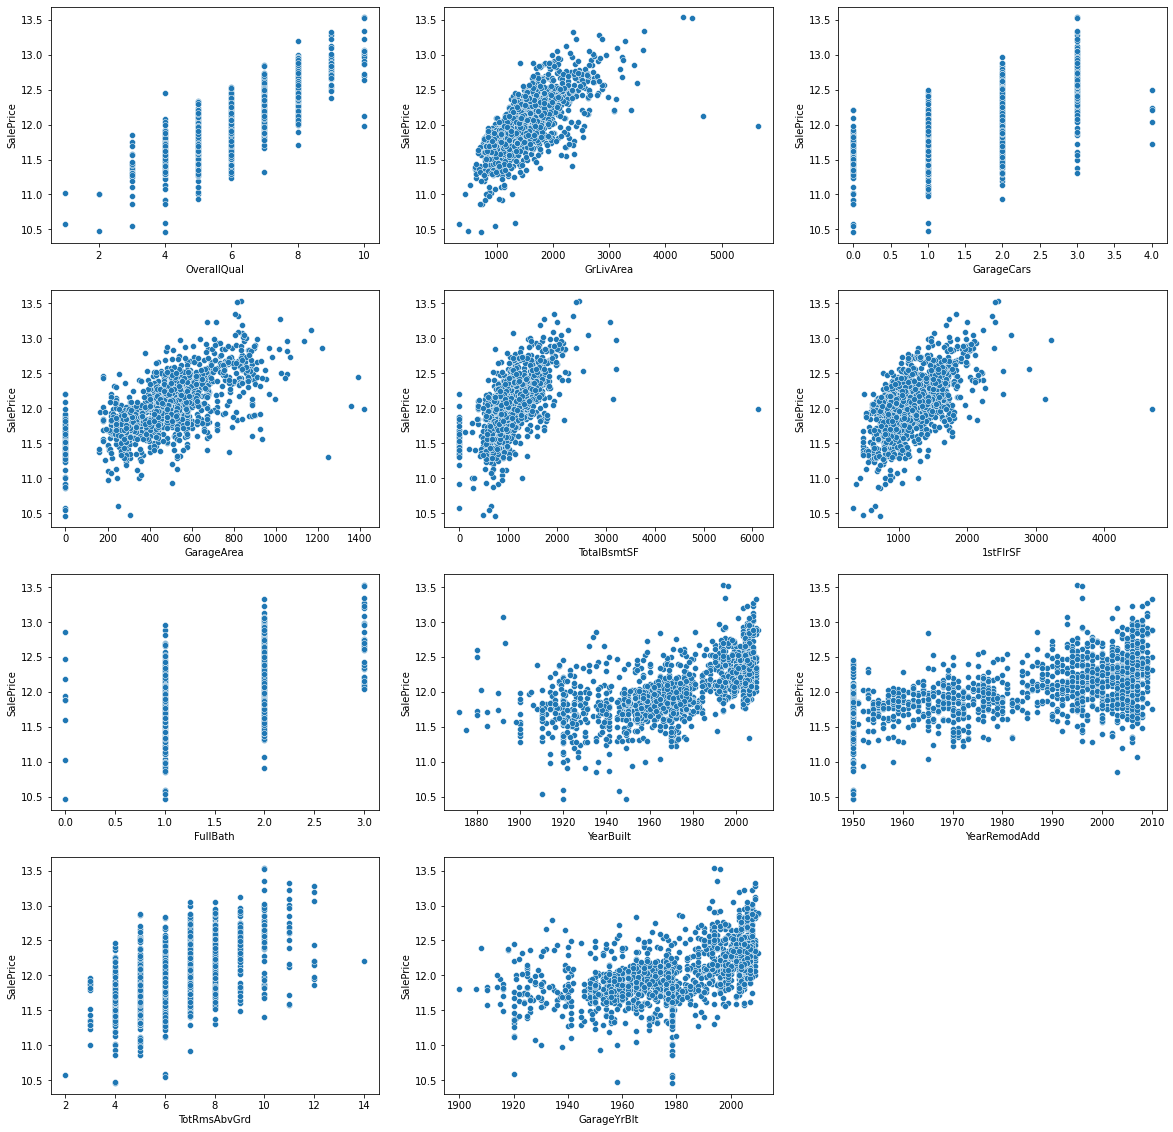

In [62]:
# Drawing Pair plots for the correlated features
plt.figure(figsize=(20, 20))
plt.subplot(4,3,1)
sns.scatterplot(x='OverallQual',y='SalePrice' ,data=housing)
plt.subplot(4,3,2)
sns.scatterplot(x='GrLivArea',y='SalePrice' ,data=housing)
plt.subplot(4,3,3)
sns.scatterplot(x='GarageCars',y='SalePrice' ,data=housing)
plt.subplot(4,3,4)
sns.scatterplot(x='GarageArea',y='SalePrice' ,data=housing)
plt.subplot(4,3,5)
sns.scatterplot(x='TotalBsmtSF',y='SalePrice' ,data=housing)
plt.subplot(4,3,6)
sns.scatterplot(x='1stFlrSF',y='SalePrice' ,data=housing)
plt.subplot(4,3,7)
sns.scatterplot(x='FullBath',y='SalePrice' ,data=housing)
plt.subplot(4,3,8)
sns.scatterplot(x='YearBuilt',y='SalePrice' ,data=housing)
plt.subplot(4,3,9)
sns.scatterplot(x='YearRemodAdd',y='SalePrice' ,data=housing)
plt.subplot(4,3,10)
sns.scatterplot(x='TotRmsAbvGrd',y='SalePrice' ,data=housing)
plt.subplot(4,3,11)
sns.scatterplot(x='GarageYrBlt',y='SalePrice' ,data=housing)
plt.show()

In [ ]:
> Lets check for categorical columns and their effect on price

In [67]:
housing_Categories = housing.select_dtypes(include=['object'])
housing_Categories.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [68]:
> we have many categories column so lets make  random groups and visualize them
> we will make two graphs to understand, first the countplot and secondaly effect of that variable on 
dependent variable i.e. SalePrice using Boxplot

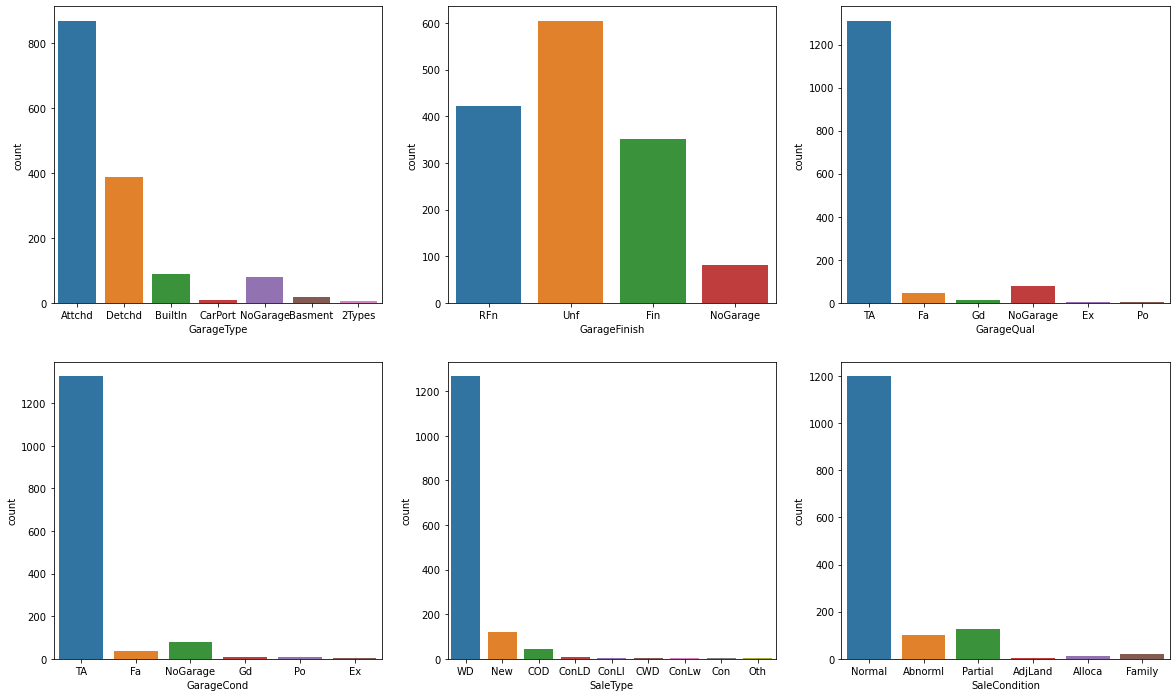

In [69]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageType',  data = housing)
plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish', data = housing)
plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = housing)
plt.subplot(2,3,4)
sns.countplot(x = 'GarageCond', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'SaleType',  data = housing)
plt.subplot(2,3,6)
sns.countplot(x = 'SaleCondition', data = housing)
plt.show()

In [70]:
housing.GarageType.value_counts()

Attchd      870
Detchd      387
BuiltIn      88
NoGarage     81
Basment      19
CarPort       9
2Types        6
Name: GarageType, dtype: int64

In [71]:
housing.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

We see that the GarageQual , GarageCond , SaleType are highly skewed hence we drop them

In [72]:
housing.drop(['GarageQual','GarageCond','SaleType'],axis=1,inplace=True)

In [73]:
housing['GarageType'] = housing['GarageType'].replace(['Basment','CarPort','2Types'],'Others')
housing['SaleCondition'] = housing['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others')

<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

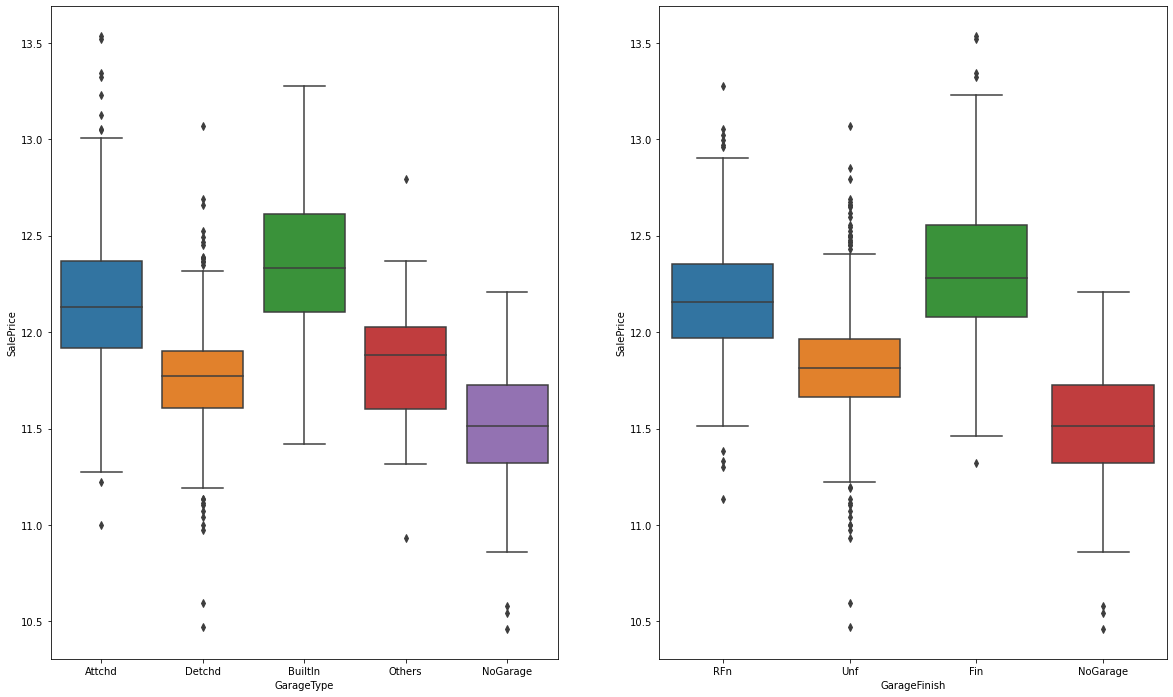

In [74]:
#Let's see effect of Garage type and GarageFinish on SalePrice

plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.boxplot(x = 'GarageType', y ='SalePrice', data = housing)
plt.subplot(1,2,2)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = housing)

> Sale Price of BuiltIn Garage & Finished Garage is the highest.

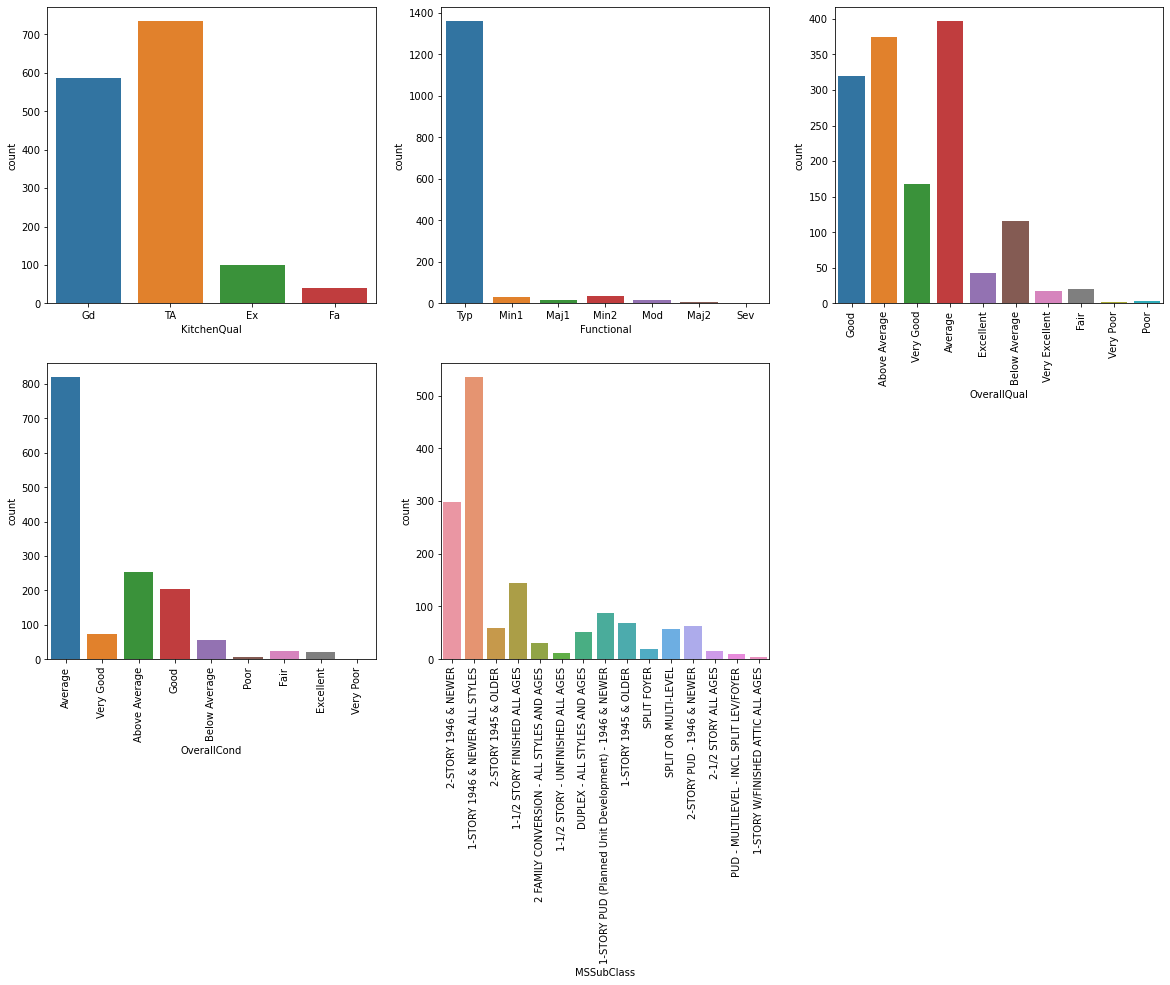

In [76]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'KitchenQual',  data = housing)
plt.subplot(2,3,2)
sns.countplot(x = 'Functional', data = housing)
plt.subplot(2,3,3)
sns.countplot(x = 'OverallQual', data = housing)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'OverallCond', data = housing)
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.countplot(x = 'MSSubClass',  data = housing)
plt.xticks(rotation=90)


plt.show()

#### So we see that the Functional category is highly skewed, so we drop the Functional column

In [78]:
housing.drop(['Functional'],axis=1,inplace=True)

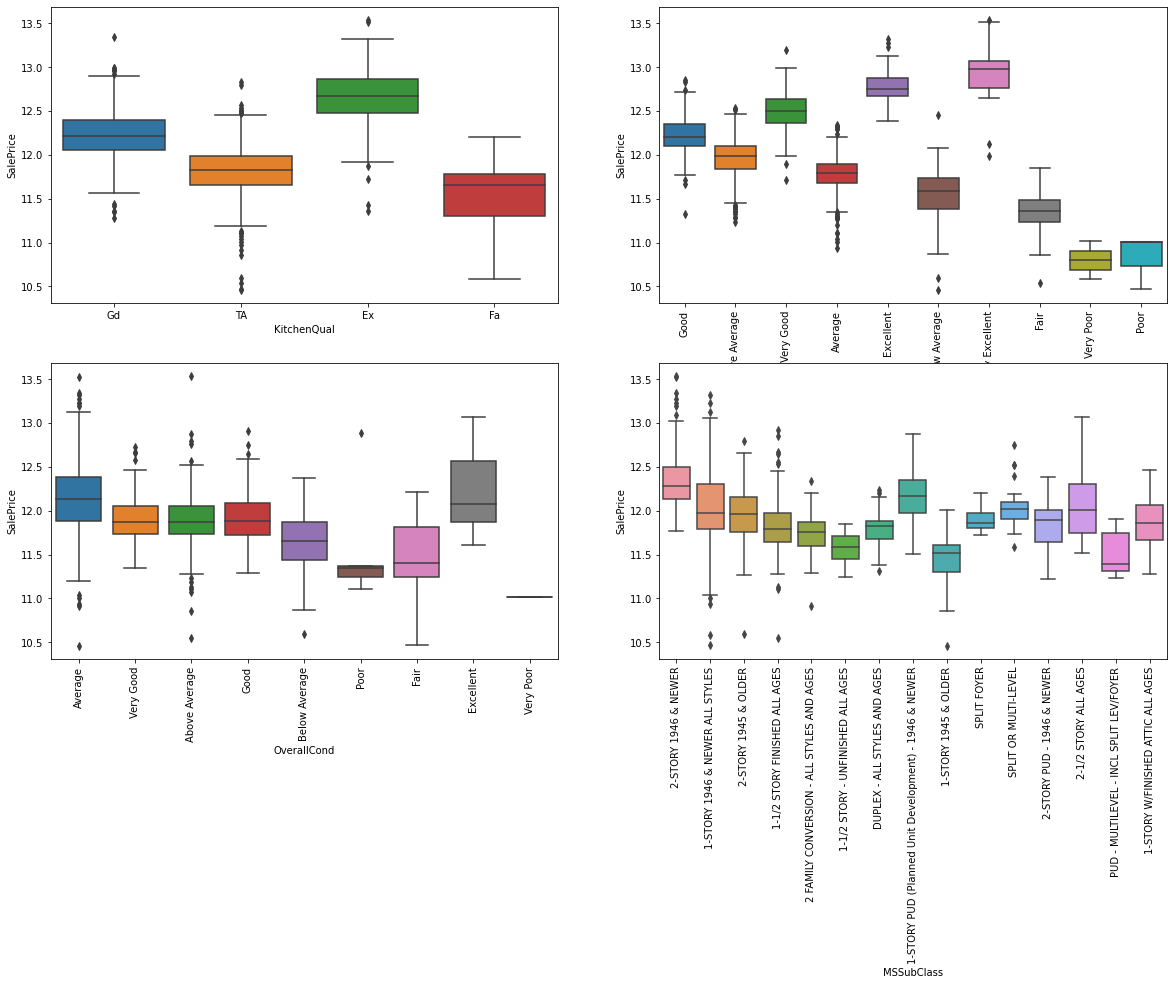

In [79]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x ='KitchenQual', y ='SalePrice', data = housing)
plt.subplot(2,2,2)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = housing)
plt.xticks(rotation=90)

plt.subplot(2,2,3)
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = housing)
plt.xticks(rotation=90)

plt.subplot(2,2,4)
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = housing)
plt.xticks(rotation=90)

plt.show()

> So we see that houses with Overall quality, Kitchen Quality and Overall Condition as Excellent has highest sale price

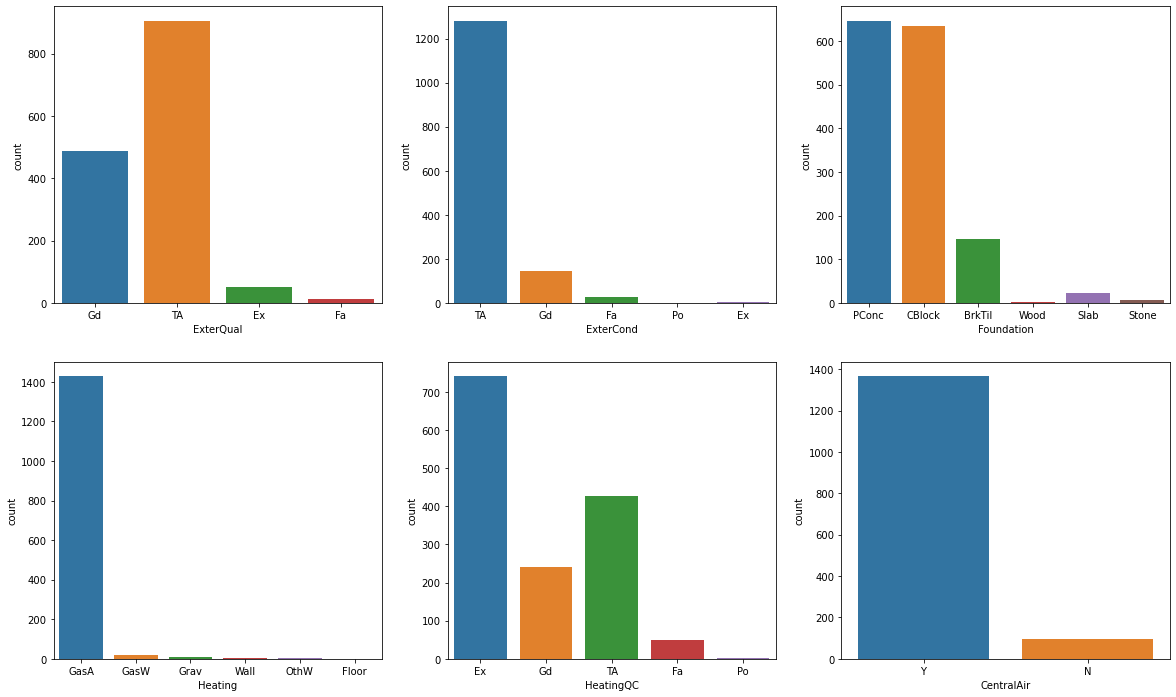

In [80]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'ExterQual',  data = housing)
plt.subplot(2,3,2)
sns.countplot(x = 'ExterCond', data = housing)
plt.subplot(2,3,3)
sns.countplot(x = 'Foundation', data = housing)
plt.subplot(2,3,4)
sns.countplot(x = 'Heating', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'HeatingQC',  data = housing)
plt.subplot(2,3,6)
sns.countplot(x = 'CentralAir', data = housing)
plt.show()

1. Most of ExterQual, ExerCond is Typical/Average
2. Poured Contrete Foundation are the highest in number
3. Categories like Heating , Central Airconditioning and External Condition are skewed so dropping these variables

In [81]:
housing['Foundation'] = housing['Foundation'].replace(['Slab','Stone','Wood'],'Others')

# Dropping highly skewed column 
housing.drop(['CentralAir','Heating','ExterCond'],axis=1,inplace=True)

<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>

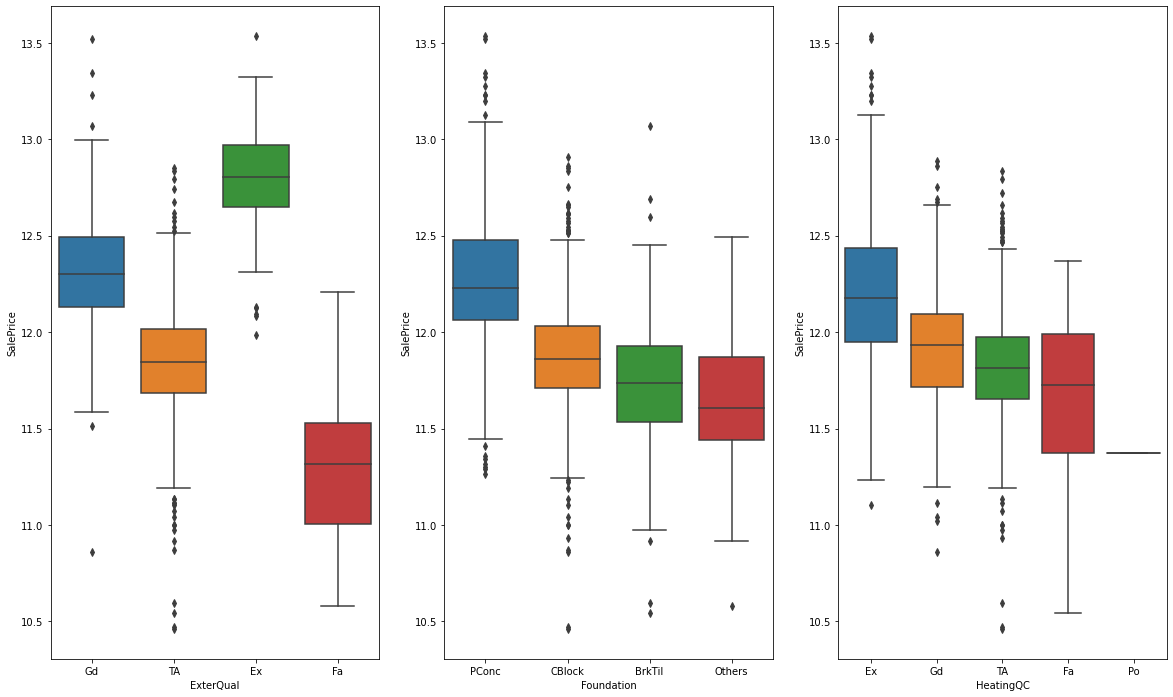

In [82]:
#Let's visualise effect of External Quality, Foundation and HeatingQC on SalePrice

plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.boxplot(x = 'ExterQual', y ='SalePrice', data = housing)
plt.subplot(1,3,2)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = housing)
plt.subplot(1,3,3)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = housing)

> So we see the houses with Excellent External Quality and Heating Quality have the highest sale price. Also Poured Concrete Foundation has the highest sale price.

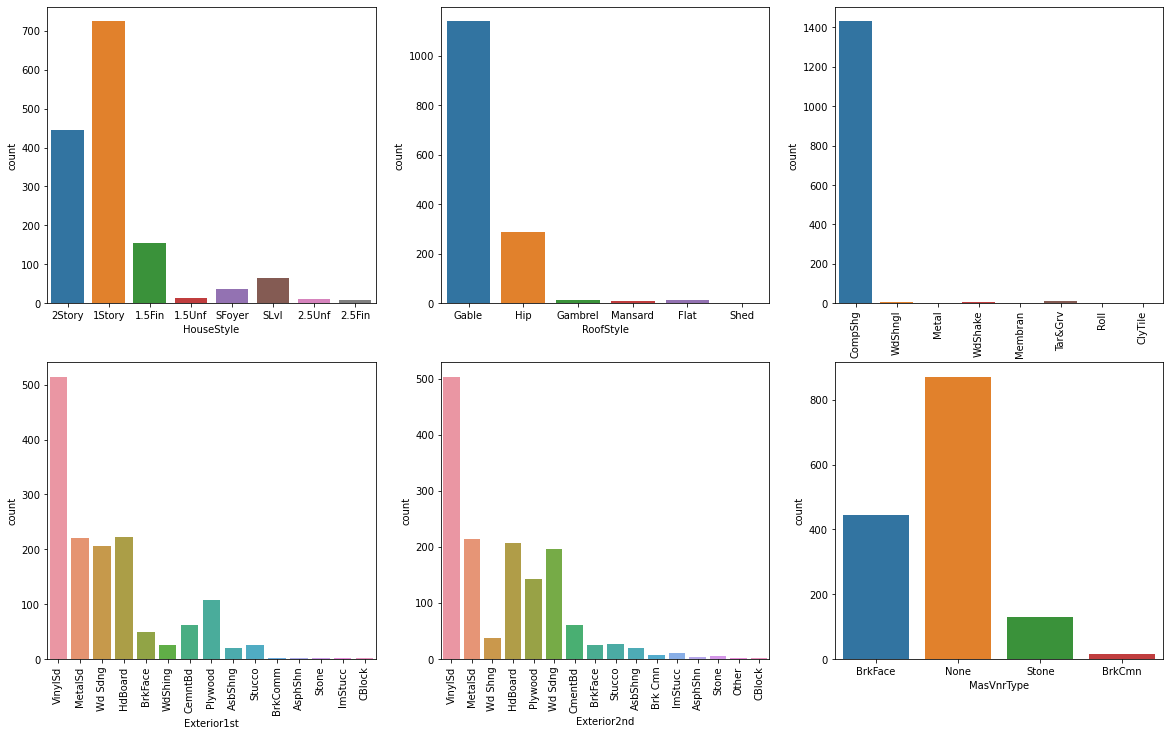

In [83]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'HouseStyle',  data = housing)
plt.subplot(2,3,2)
sns.countplot(x = 'RoofStyle', data = housing)
plt.subplot(2,3,3)
sns.countplot(x = 'RoofMatl', data = housing)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Exterior1st', data = housing)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.countplot(x = 'Exterior2nd',  data = housing)
plt.xticks(rotation=90)
plt.subplot(2,3,6)
sns.countplot(x = 'MasVnrType', data = housing)
plt.show()

In [84]:
housing['HouseStyle'] = housing['HouseStyle'].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')
housing['RoofStyle'] = housing['RoofStyle'].replace(['Shed','Mansard','Gambrel','Flat'],'Others')
housing['Exterior1st'] = housing['Exterior1st'].replace(['AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing'],'Others')
housing['Exterior2nd'] = housing['Exterior2nd'].replace(['Other','AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','BrkFace'],'Others')

# Dropping highly skewed column Roof Material
housing.drop(['RoofMatl'],axis=1,inplace=True)

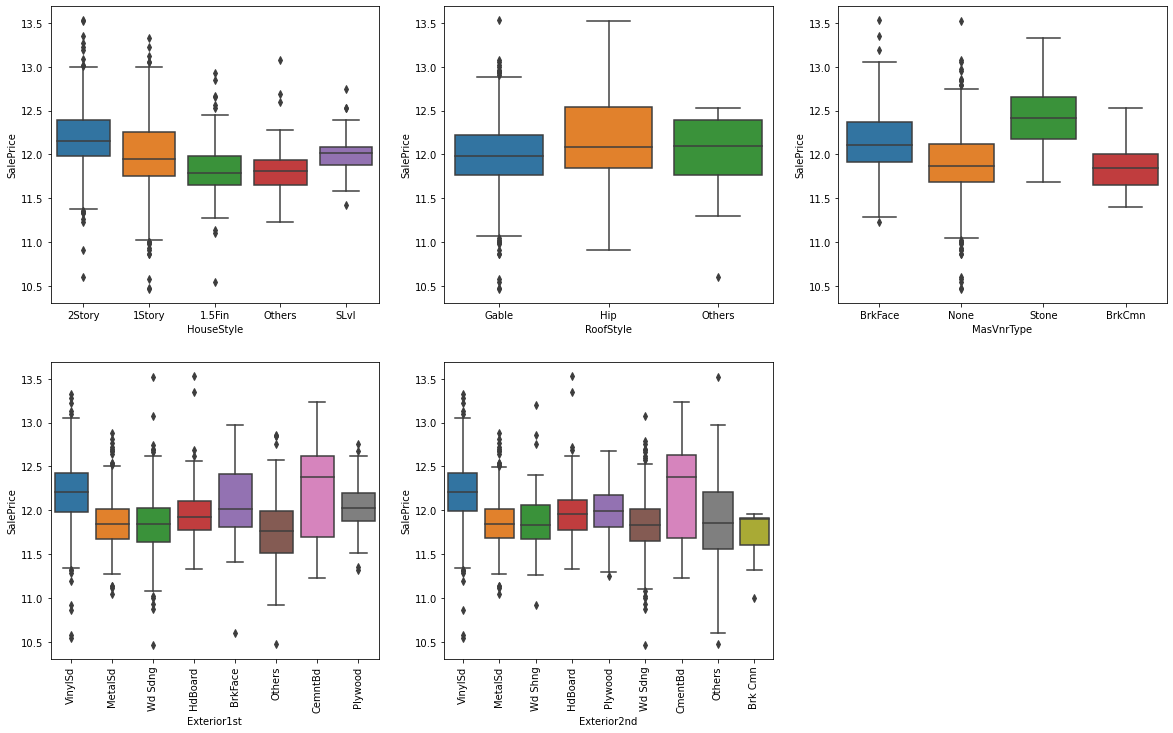

In [85]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'HouseStyle', y ='SalePrice', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = housing)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = housing)
plt.xticks(rotation=90)
plt.show()

> Mostly 2 storey houses , Roof Style hip have highest sale price.
Also Exterior covering on house for cemented bed houses have the highest sale price.

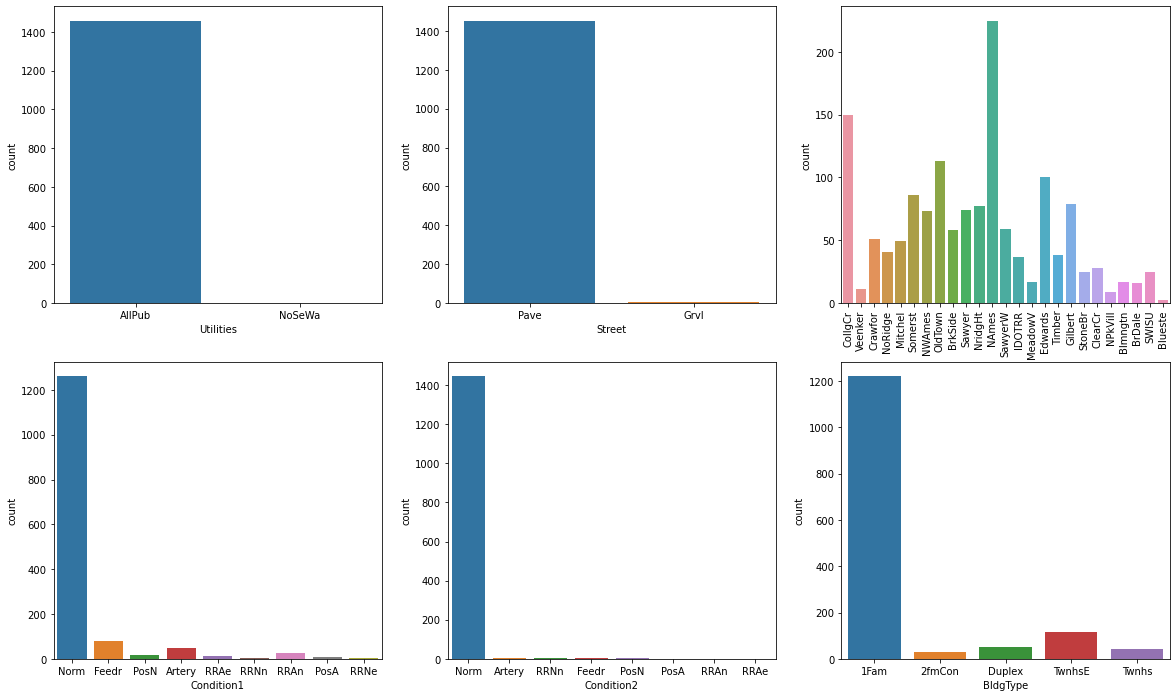

In [86]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'Utilities',  data = housing)
plt.subplot(2,3,2)
sns.countplot(x = 'Street', data = housing)
plt.subplot(2,3,3)
sns.countplot(x = 'Neighborhood', data = housing)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Condition1', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'Condition2',  data = housing)
plt.subplot(2,3,6)
sns.countplot(x = 'BldgType', data = housing)
plt.show()

In [87]:
# Dropping highly skewed column 
housing.drop(['Utilities','Street','Condition1','Condition2'],axis=1,inplace=True)

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

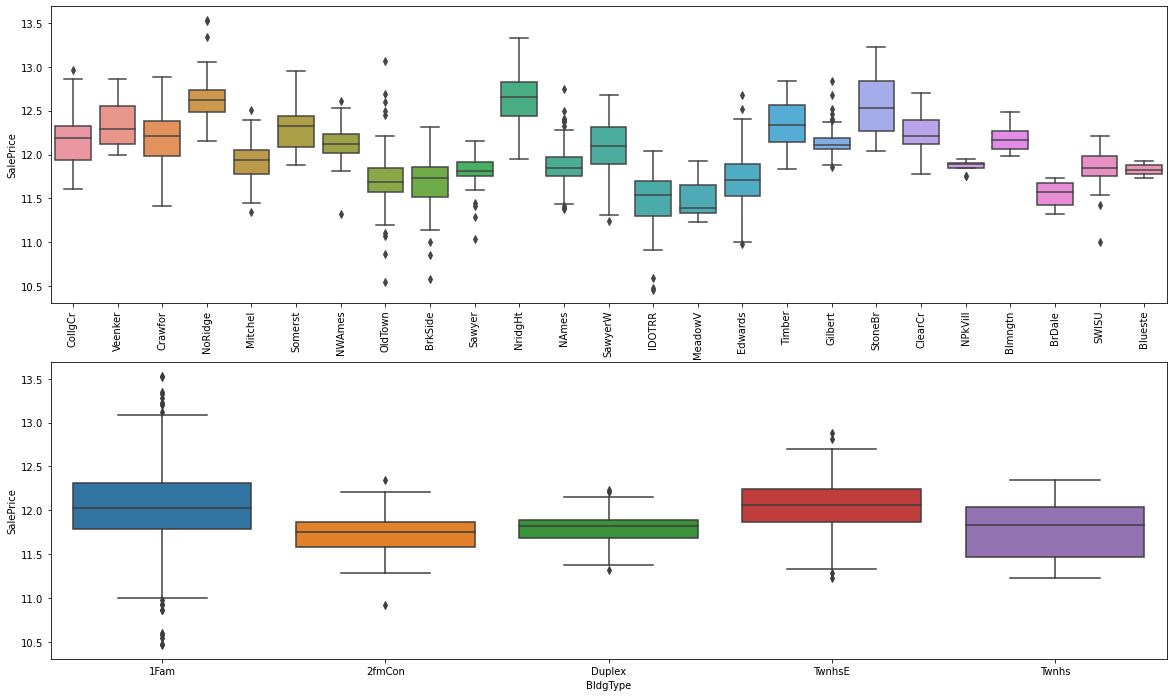

In [88]:
plt.figure(figsize=(20, 12))
plt.subplot(2,1,1)
sns.boxplot(x = 'Neighborhood', y ='SalePrice', data = housing)
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = housing)

> Houses in the neighbourhood of Stone Brook ,Northridge Heights ,Northridge and 
Building type as Single-family Detached have the highest sale price

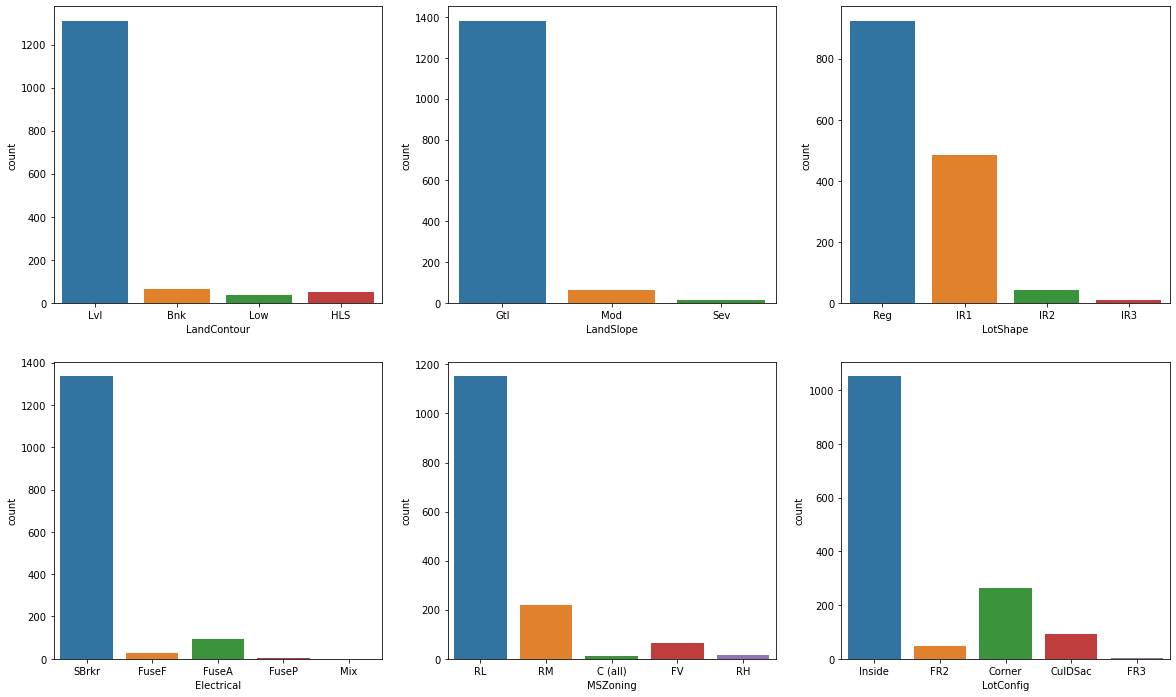

In [89]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'LandContour',  data = housing)
plt.subplot(2,3,2)
sns.countplot(x = 'LandSlope', data = housing)
plt.subplot(2,3,3)
sns.countplot(x = 'LotShape', data = housing)
plt.subplot(2,3,4)
sns.countplot(x = 'Electrical', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'MSZoning',  data = housing)
plt.subplot(2,3,6)
sns.countplot(x = 'LotConfig', data = housing)
plt.show()

In [ ]:
housing.drop(['LandSlope','LandContour','Electrical'],axis=1,inplace=True)


In [92]:
housing['MSZoning'] = housing['MSZoning'].replace(['RH','C (all)'],'Others')

<AxesSubplot:xlabel='LotConfig', ylabel='SalePrice'>

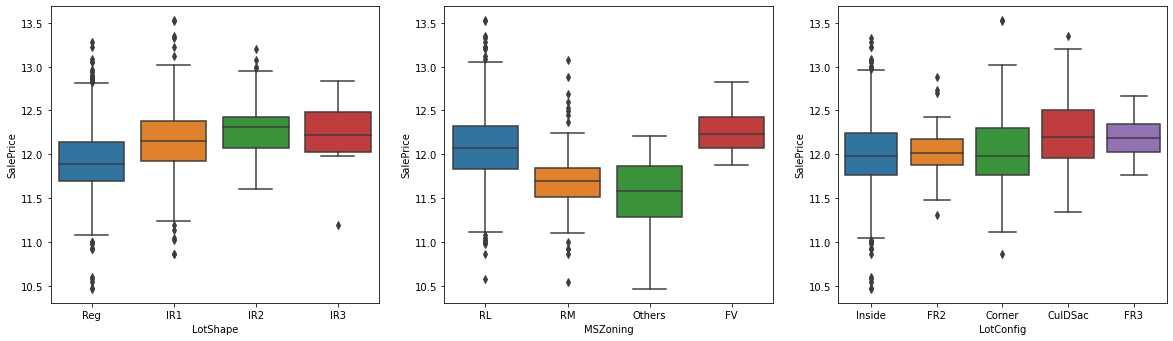

In [94]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'LotShape', y ='SalePrice', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = housing)

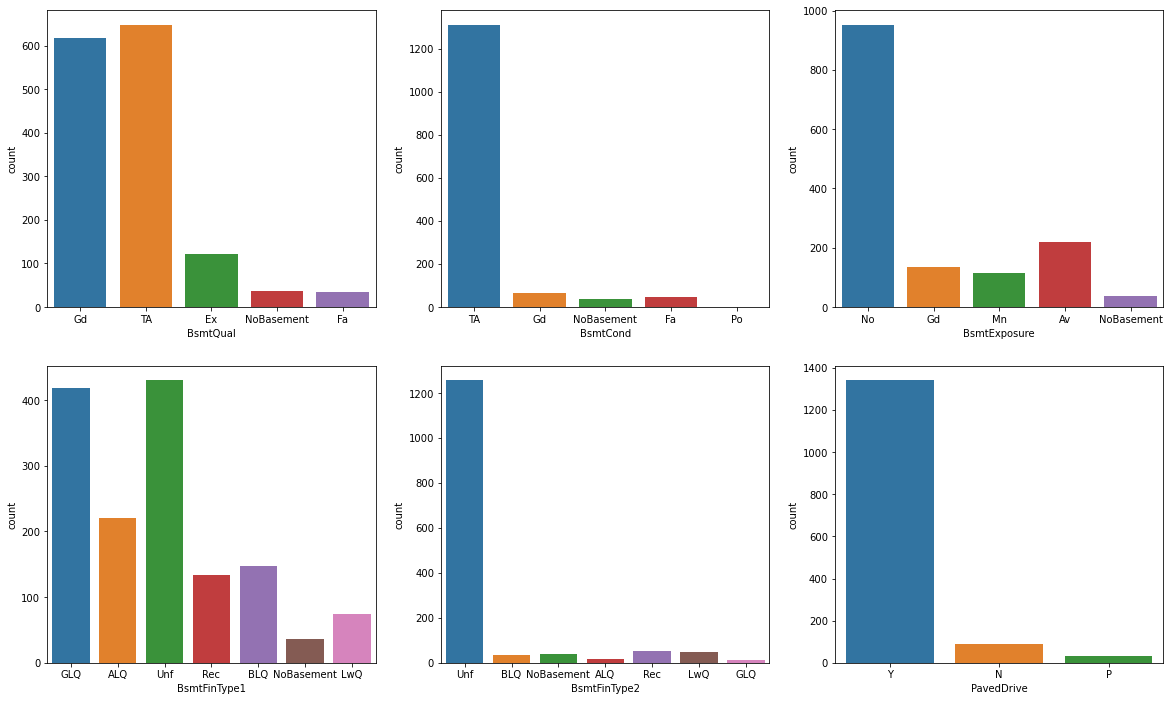

In [95]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtQual',  data = housing)
plt.subplot(2,3,2)
sns.countplot(x = 'BsmtCond', data = housing)
plt.subplot(2,3,3)
sns.countplot(x = 'BsmtExposure', data = housing)
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtFinType1', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'BsmtFinType2',  data = housing)
plt.subplot(2,3,6)
sns.countplot(x = 'PavedDrive', data = housing)
plt.show()

In [96]:
# Dropping highly skewed categories
housing.drop(['BsmtFinType2','PavedDrive','BsmtCond'],axis=1,inplace=True)

<AxesSubplot:xlabel='BsmtExposure', ylabel='SalePrice'>

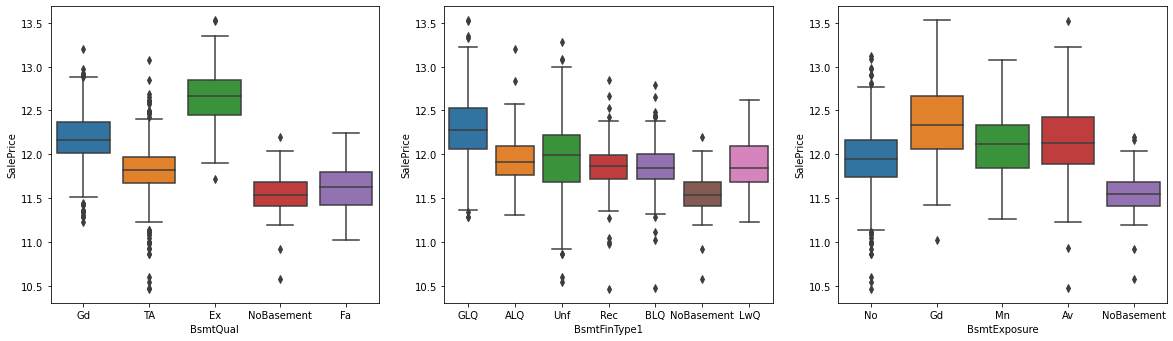

In [97]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'BsmtQual', y ='SalePrice', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = housing)

In [98]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   object 
 11  OverallCond    1460 non-null   object 
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1460 non-null   object 
 18  MasVnrAr

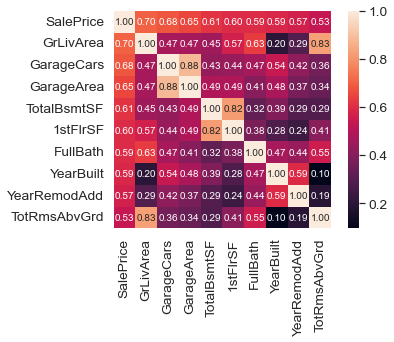

In [100]:
#saleprice correlation matrix
corrmat = housing.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [101]:
housing['YearSinceRemodel'] = 2010 - ((housing['YearRemodAdd'] - housing['YearBuilt']) + housing['YearBuilt']) #feature engineering

In [102]:
housing_Cat = housing.select_dtypes(include=['object']) #checking all categorical columns to form dummy variables
housing_Cat.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'SaleCondition'],
      dtype='object')

In [103]:
housing_Num = housing.select_dtypes(include=['int64','float64']) #checking all numerical variables
housing_Num.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'YearSinceRemodel'],
      dtype='object')

In [104]:
housing_Cat = pd.get_dummies(housing_Cat,drop_first=True)  # Dummy variables
print(housing_Cat.shape)

(1460, 130)


In [105]:
housing_Cat.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_NoGarage,GarageType_Others,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0


In [106]:
# concat dummy variables with main dataset
housing = pd.concat([housing, housing_Cat], axis=1) 

In [107]:
housing.drop(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish',
       'SaleCondition','Id','OverallCond','MSSubClass','OverallQual'],axis=1,inplace=True) #removing columns as dummy variables already formed

In [108]:
housing.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_NoGarage,GarageType_Others,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,0,0,0,0,1,0,1,0,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,0,0,0,0,1,0,1,0,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,1,0,0,0,0,1,0,0,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,0,0,0,0,1,0,1,0,0


In [109]:
housing.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True) #not important for making this model 

In [163]:
housing.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_NoGarage,GarageType_Others,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,0,0,1,0,1,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,0,0,1,0,1,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,1,0,0,0,0,1,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,0,0,1,0,1,0,0


### Train Test Split

In [164]:
# Putting feature variable to X
X = housing.drop(['SalePrice'], axis=1)

X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_NoGarage,GarageType_Others,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,0,0,1,0,1,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,0,0,1,0,1,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,1,0,0,0,0,1,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,0,0,1,0,1,0,0


In [165]:
# Putting response variable to y
y = housing['SalePrice']

y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [166]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [167]:
scaler = StandardScaler()

X_train[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']] = scaler.fit_transform(X_train[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']])

X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_NoGarage,GarageType_Others,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
210,-0.115302,-0.473765,-0.558025,0.043512,-0.293313,-0.374367,-0.430911,-0.765065,-0.787597,-0.124502,...,0,0,1,0,1,0,0,1,0,0
318,0.926898,-0.056845,0.809137,1.160345,-0.293313,-0.454644,0.621579,0.511914,2.140556,-0.124502,...,0,0,0,0,0,1,0,1,0,0
239,-0.794998,-0.169324,-0.558025,-0.761296,-0.293313,0.171964,-0.712011,-0.930972,0.795996,-0.124502,...,0,1,0,0,0,0,1,1,0,0
986,-0.477806,-0.502297,-0.558025,-0.963574,-0.293313,-0.175904,-1.256778,-0.420683,0.669584,-0.124502,...,0,0,0,0,0,0,1,1,0,0
1416,-0.432493,0.082905,-0.558025,-0.963574,-0.293313,0.475233,-0.620490,0.195183,1.611926,-0.124502,...,0,1,0,0,0,0,1,1,0,0


In [168]:
X_train.shape

(1021, 160)

In [169]:
X_test.shape

(438, 160)

In [170]:
y_train.shape

(1021,)

In [171]:
y_test.shape

(438,)

## Model Building and Evaluation

### 1. Ridge

In [172]:
# list of alphas to tune
params = {'alpha': [0.00015, 0.0005, 0.0015, 0.005, 0.003,0,20]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.00015, 0.0005, 0.0015, 0.005, 0.003, 0,
                                   20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [173]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015160,0.003858,0.006781,0.001932,0.00015,{'alpha': 0.00015},-0.101329,-0.098720,-0.105160,-0.089839,...,-0.098727,0.005043,6,-0.079427,-0.070124,-0.074206,-0.080636,-0.079286,-0.076736,0.003977
1,0.008942,0.007344,0.008475,0.005730,0.0005,{'alpha': 0.0005},-0.101328,-0.098719,-0.105159,-0.089836,...,-0.098724,0.005044,5,-0.079426,-0.070124,-0.074205,-0.080636,-0.079286,-0.076736,0.003977
2,0.012965,0.001093,0.005985,0.001669,0.0015,{'alpha': 0.0015},-0.101325,-0.098715,-0.105158,-0.089826,...,-0.098715,0.005047,4,-0.079425,-0.070124,-0.074204,-0.080636,-0.079287,-0.076735,0.003977
3,0.012167,0.000977,0.005185,0.000977,0.005,{'alpha': 0.005},-0.101313,-0.098701,-0.105152,-0.089791,...,-0.098684,0.005057,2,-0.079420,-0.070123,-0.074198,-0.080636,-0.079288,-0.076733,0.003978
4,0.012367,0.002239,0.004786,0.001162,0.003,{'alpha': 0.003},-0.101320,-0.098709,-0.105155,-0.089811,...,-0.098702,0.005052,3,-0.079423,-0.070124,-0.074201,-0.080636,-0.079287,-0.076734,0.003977


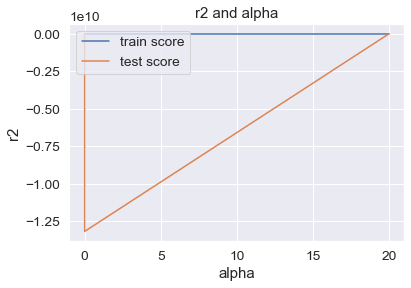

In [175]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [176]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [177]:
y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9015619677858261

In [178]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9078458199499747

#### Checking r2_score for different values of alpha 10, 5, 2, 0.01, 0.03, 0.05

In [128]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9093795133774626

In [129]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9211675036617367

In [130]:
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9143180646068195

In [131]:
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9308214026600079

In [132]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9179038801292574

In [133]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9383841758560444

In [134]:
alpha = 0.01
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9204793443335753

In [135]:
alpha = 0.01
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9462269523052795

In [136]:
alpha = 0.03
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9204753298435336

In [137]:
alpha = 0.03
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9461544629847991

In [138]:
alpha = 0.05
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

y_train_pred=ridge.predict(X_train)
r2_score(y_train,y_train_pred)

0.9204680787372677

In [139]:
alpha = 0.05
ridge = Ridge(alpha=alpha)

ridge.fit(X_test, y_test)

y_test_pred=ridge.predict(X_test)
r2_score(y_test,y_test_pred)

0.9460505550114591

In [140]:
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.72),
 ('LotFrontage', -0.469),
 ('LotArea', -0.402),
 ('MasVnrArea', -0.398),
 ('BsmtFinSF1', -0.375),
 ('BsmtFinSF2', -0.278),
 ('BsmtUnfSF', -0.274),
 ('TotalBsmtSF', -0.192),
 ('1stFlrSF', -0.19),
 ('2ndFlrSF', -0.189),
 ('LowQualFinSF', -0.174),
 ('GrLivArea', -0.169),
 ('BsmtFullBath', -0.167),
 ('BsmtHalfBath', -0.162),
 ('FullBath', -0.162),
 ('HalfBath', -0.162),
 ('BedroomAbvGr', -0.155),
 ('KitchenAbvGr', -0.143),
 ('TotRmsAbvGrd', -0.135),
 ('Fireplaces', -0.133),
 ('GarageCars', -0.125),
 ('GarageArea', -0.124),
 ('WoodDeckSF', -0.119),
 ('OpenPorchSF', -0.118),
 ('EnclosedPorch', -0.107),
 ('3SsnPorch', -0.098),
 ('ScreenPorch', -0.098),
 ('PoolArea', -0.093),
 ('MiscVal', -0.093),
 ('MoSold', -0.084),
 ('YearSinceRemodel', -0.082),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.073),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.071),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.07),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', 

### 2. Lasso

In [179]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.00015, 0.0005, 0.0015, 0.005, 0.003, 0,
                                   20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [180]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.150048,0.015969,0.005387,0.001196,0.00015,{'alpha': 0.00015},-0.098789,-0.098441,-0.102655,-0.085192,...,-0.095383,0.006169,2,-0.079102,-0.071060,-0.074051,-0.080563,-0.079631,-0.076881,0.003686
1,0.065501,0.008246,0.005785,0.001716,0.0005,{'alpha': 0.0005},-0.094087,-0.098413,-0.101418,-0.086158,...,-0.093512,0.005954,1,-0.080944,-0.074549,-0.076433,-0.082254,-0.082114,-0.079259,0.003166
2,0.025305,0.002192,0.005133,0.001857,0.0015,{'alpha': 0.0015},-0.091931,-0.102639,-0.103825,-0.092917,...,-0.096991,0.005139,3,-0.088460,-0.080721,-0.084887,-0.088290,-0.088733,-0.086218,0.003086
3,0.016576,0.002476,0.005903,0.001578,0.005,{'alpha': 0.005},-0.097583,-0.117108,-0.115209,-0.106752,...,-0.110364,0.007327,6,-0.106461,-0.099023,-0.101955,-0.105093,-0.106690,-0.103844,0.002943
4,0.018465,0.002910,0.005188,0.000979,0.003,{'alpha': 0.003},-0.093992,-0.110566,-0.108719,-0.101003,...,-0.104135,0.006003,5,-0.096844,-0.089419,-0.094071,-0.096797,-0.098396,-0.095105,0.003166


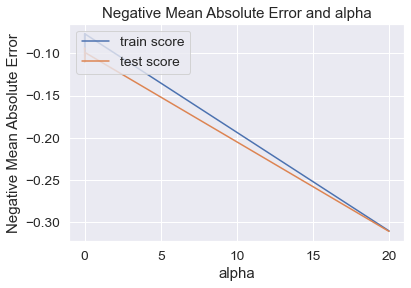

In [181]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [184]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [185]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [186]:
y_train_pred=lasso.predict(X_train)
r2_score(y_train,y_train_pred)

0.8986434649520424

In [187]:
alpha =0.001

lasso = Lasso(alpha=alpha)

lasso.fit(X_test, y_test)

y_test_pred=lasso.predict(X_test)
r2_score(y_test,y_test_pred)

0.9243259475978386

In [189]:
# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list((zip(cols, model_parameters)))

[('constant', 11.252),
 ('LotFrontage', -0.315),
 ('LotArea', -0.204),
 ('MasVnrArea', -0.201),
 ('BsmtFinSF1', -0.151),
 ('BsmtFinSF2', -0.109),
 ('BsmtUnfSF', -0.092),
 ('TotalBsmtSF', -0.086),
 ('1stFlrSF', -0.08),
 ('2ndFlrSF', -0.045),
 ('LowQualFinSF', -0.042),
 ('GrLivArea', -0.042),
 ('BsmtFullBath', -0.04),
 ('BsmtHalfBath', -0.036),
 ('FullBath', -0.033),
 ('HalfBath', -0.024),
 ('BedroomAbvGr', -0.023),
 ('KitchenAbvGr', -0.022),
 ('TotRmsAbvGrd', -0.018),
 ('Fireplaces', -0.017),
 ('GarageCars', -0.016),
 ('GarageArea', -0.016),
 ('WoodDeckSF', -0.015),
 ('OpenPorchSF', -0.014),
 ('EnclosedPorch', -0.01),
 ('3SsnPorch', -0.009),
 ('ScreenPorch', -0.008),
 ('PoolArea', -0.008),
 ('MiscVal', -0.007),
 ('MoSold', -0.006),
 ('YearSinceRemodel', -0.005),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.005),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.004),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.001),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', 

### So we see that with both Ridge and Lasso we are getting a decent score.  We can use either for the final model and because of Feature selection  we will choose Lasso regression in this case.

#### Most Significant Variables for Lasso
1. 'SaleCondition_Partial', 0.12
2. 'SaleCondition_Others', 0.117
3. 'SaleCondition_Normal', 0.098
4. 'GarageFinish_Unf', 0.094
5. 'GarageFinish_RFn', 0.082


#### Most Significant Variables for Ridge
1. 'SaleCondition_Partial', 0.262
2. 'SaleCondition_Others', 0.178
3. 'SaleCondition_Normal', 0.153
4. 'GarageFinish_Unf', 0.148
5. 'GarageFinish_RFn', 0.131


#### Final Conclusion :
we got a decent score for both Ridge and Lasso regression.

•	Ridge : Train :90.1 Test :90.7

•	Lasso : Train :89.8 Test :92.4




#### Optimal Value of alpha

Optimal Value of alpha for ridge : 10

Optimal Value of alpha for Lasso : 0.001